https://www.machinehack.com/course/predict-the-flight-ticket-price-hackathon/

## Predict The Flight Ticket Price Hackathon

Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travellers saying that flight ticket prices are so unpredictable. Huh! Here we take on the challenge! As data scientists, we are gonna prove that given the right data anything can be predicted. Here you will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.

Size of training set: 10683 records

Size of test set: 2671 records

FEATURES:
Airline: The name of the airline.

Date_of_Journey: The date of the journey

Source: The source from which the service begins.

Destination: The destination where the service ends.

Route: The route taken by the flight to reach the destination.

Dep_Time: The time when the journey starts from the source.

Arrival_Time: Time of arrival at the destination.

Duration: Total duration of the flight.

Total_Stops: Total stops between the source and destination.

Additional_Info: Additional information about the flight

Price: The price of the ticket

In [1]:
from google.colab import files

uploaded = files.upload()

Saving Data_Train.xlsx to Data_Train.xlsx
Saving Test_set.xlsx to Test_set.xlsx


In [2]:
!ls

Data_Train.xlsx  sample_data  Test_set.xlsx


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
import seaborn as sns

In [5]:
train_df=pd.read_excel('Data_Train.xlsx')
test_df=pd.read_excel('Test_set.xlsx')

In [6]:
train_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [7]:
test_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [8]:
big_df=train_df.append(test_df,sort=False)

In [9]:
big_df.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,NaN
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info,NaN
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,NaN
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info,NaN
2670,Multiple carriers,15/06/2019,Delhi,Cochin,DEL → BOM → COK,04:55,19:15,14h 20m,1 stop,No info,NaN


In [10]:
big_df.dtypes

Airline             object
Date_of_Journey     object
Source              object
Destination         object
Route               object
Dep_Time            object
Arrival_Time        object
Duration            object
Total_Stops         object
Additional_Info     object
Price              float64
dtype: object

In [11]:
big_df.Additional_Info.unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [12]:
big_df.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,NaN
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info,NaN
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,NaN
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info,NaN
2670,Multiple carriers,15/06/2019,Delhi,Cochin,DEL → BOM → COK,04:55,19:15,14h 20m,1 stop,No info,NaN


## Feature Engineering 

In [13]:
big_df['Date']=big_df['Date_of_Journey'].str.split('/').str[0]
big_df['Month']=big_df['Date_of_Journey'].str.split('/').str[1]
big_df['Year']=big_df['Date_of_Journey'].str.split('/').str[2]

In [14]:
big_df['Date']=big_df['Date'].astype(int)
big_df['Month']=big_df['Month'].astype(int)
big_df['Year']=big_df['Year'].astype(int)

In [15]:
import datetime
li=[]
for index, row in big_df.iterrows():
    d = row[11]
    m = row[12]
    y = row[13]
    x = datetime.date(y,m,d)  
    z = x.weekday()

    if z == 0:
      li.append(1) 
    elif z == 1:
      li.append(1)
    elif z == 2:
      li.append(1)   
    elif z == 3:
      li.append(1)
    elif z == 4:
      li.append(1)
    elif z == 5:
      li.append(2)     
    elif z == 6:
      li.append(2) 
    else:
      pass


    # do some logic here

In [16]:
big_df['day_type'] = li


In [17]:
big_df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,day_type
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,3,2019,2
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019,1
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,9,6,2019,2
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5,2019,2
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3,2019,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,NaN,6,6,2019,1
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info,NaN,27,3,2019,1
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,NaN,6,3,2019,1
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info,NaN,6,3,2019,1


In [18]:
big_df.dtypes

Airline             object
Date_of_Journey     object
Source              object
Destination         object
Route               object
Dep_Time            object
Arrival_Time        object
Duration            object
Total_Stops         object
Additional_Info     object
Price              float64
Date                 int64
Month                int64
Year                 int64
day_type             int64
dtype: object

In [19]:
big_df.dtypes

Airline             object
Date_of_Journey     object
Source              object
Destination         object
Route               object
Dep_Time            object
Arrival_Time        object
Duration            object
Total_Stops         object
Additional_Info     object
Price              float64
Date                 int64
Month                int64
Year                 int64
day_type             int64
dtype: object

In [20]:
big_df=big_df.drop(['Date_of_Journey'],axis=1)

In [21]:
big_df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,day_type
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,3,2019,2
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019,1
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,9,6,2019,2
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5,2019,2
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3,2019,1


In [22]:
big_df['Arrival_Time']=big_df['Arrival_Time'].str.split(' ').str[0]

In [23]:
big_df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,day_type
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,non-stop,No info,3897.0,24,3,2019,2
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019,1
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2 stops,No info,13882.0,9,6,2019,2
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5,2019,2
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3,2019,1


In [24]:
big_df[big_df['Total_Stops'].isnull()]

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,day_type
9039,Air India,Delhi,Cochin,NaN,09:45,09:25,23h 40m,NaN,No info,7480.0,6,5,2019,1


In [25]:
big_df['Total_Stops']=big_df['Total_Stops'].fillna('1 stop')

In [26]:
big_df['Total_Stops']=big_df['Total_Stops'].replace('non-stop','0 stop')

In [27]:
big_df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,day_type
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,0 stop,No info,3897.0,24,3,2019,2
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019,1
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2 stops,No info,13882.0,9,6,2019,2
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5,2019,2
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3,2019,1


In [28]:
big_df['Stop'] = big_df['Total_Stops'].str.split(' ').str[0]

In [29]:
big_df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,day_type,Stop
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,0 stop,No info,3897.0,24,3,2019,2,0
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019,1,2
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2 stops,No info,13882.0,9,6,2019,2,2
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5,2019,2,1
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3,2019,1,1


In [30]:
big_df.dtypes

Airline             object
Source              object
Destination         object
Route               object
Dep_Time            object
Arrival_Time        object
Duration            object
Total_Stops         object
Additional_Info     object
Price              float64
Date                 int64
Month                int64
Year                 int64
day_type             int64
Stop                object
dtype: object

In [31]:
big_df['Stop']=big_df['Stop'].astype(int)
big_df=big_df.drop(['Total_Stops'],axis=1)

In [32]:
big_df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Additional_Info,Price,Date,Month,Year,day_type,Stop
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,No info,3897.0,24,3,2019,2,0
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,No info,7662.0,1,5,2019,1,2
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,No info,13882.0,9,6,2019,2,2
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,No info,6218.0,12,5,2019,2,1
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,No info,13302.0,1,3,2019,1,1


In [33]:
big_df['Arrival_Hour'] = big_df['Arrival_Time'] .str.split(':').str[0]
big_df['Arrival_Minute'] = big_df['Arrival_Time'] .str.split(':').str[1]

In [34]:
big_df['Arrival_Hour']=big_df['Arrival_Hour'].astype(int)
big_df['Arrival_Minute']=big_df['Arrival_Minute'].astype(int)
big_df=big_df.drop(['Arrival_Time'],axis=1)

In [35]:
big_df.head()

,Airline,Source,Destination,Route,Dep_Time,Duration,Additional_Info,Price,Date,Month,Year,day_type,Stop,Arrival_Hour,Arrival_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,2h 50m,No info,3897.0,24,3,2019,2,0,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,7h 25m,No info,7662.0,1,5,2019,1,2,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,19h,No info,13882.0,9,6,2019,2,2,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,5h 25m,No info,6218.0,12,5,2019,2,1,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,4h 45m,No info,13302.0,1,3,2019,1,1,21,35


In [36]:
big_df['Departure_Hour'] = big_df['Dep_Time'] .str.split(':').str[0]
big_df['Departure_Minute'] = big_df['Dep_Time'] .str.split(':').str[1]

In [37]:
big_df['Departure_Hour']=big_df['Departure_Hour'].astype(int)
big_df['Departure_Minute']=big_df['Departure_Minute'].astype(int)
big_df=big_df.drop(['Dep_Time'],axis=1)

In [38]:
big_df.head()

,Airline,Source,Destination,Route,Duration,Additional_Info,Price,Date,Month,Year,day_type,Stop,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,No info,3897.0,24,3,2019,2,0,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,No info,7662.0,1,5,2019,1,2,13,15,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,No info,13882.0,9,6,2019,2,2,4,25,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,No info,6218.0,12,5,2019,2,1,23,30,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,No info,13302.0,1,3,2019,1,1,21,35,16,50


In [39]:
big_df['Route_1']=big_df['Route'].str.split('→ ').str[0]
big_df['Route_2']=big_df['Route'].str.split('→ ').str[1]
big_df['Route_3']=big_df['Route'].str.split('→ ').str[2]
big_df['Route_4']=big_df['Route'].str.split('→ ').str[3]
big_df['Route_5']=big_df['Route'].str.split('→ ').str[4]

In [40]:
big_df.head()

,Airline,Source,Destination,Route,Duration,Additional_Info,Price,Date,Month,Year,day_type,Stop,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,No info,3897.0,24,3,2019,2,0,1,10,22,20,BLR,DEL,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,No info,7662.0,1,5,2019,1,2,13,15,5,50,CCU,IXR,BBI,BLR,NaN
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,No info,13882.0,9,6,2019,2,2,4,25,9,25,DEL,LKO,BOM,COK,NaN
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,No info,6218.0,12,5,2019,2,1,23,30,18,5,CCU,NAG,BLR,NaN,NaN
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,No info,13302.0,1,3,2019,1,1,21,35,16,50,BLR,NAG,DEL,NaN,NaN


In [41]:
big_df['Price'].fillna((big_df['Price'].mean()),inplace=True)

In [42]:
big_df['Route_1'].fillna("None",inplace=True)
big_df['Route_2'].fillna("None",inplace=True)
big_df['Route_3'].fillna("None",inplace=True)
big_df['Route_4'].fillna("None",inplace=True)
big_df['Route_5'].fillna("None",inplace=True)

In [43]:
big_df.head()

,Airline,Source,Destination,Route,Duration,Additional_Info,Price,Date,Month,Year,day_type,Stop,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,No info,3897.0,24,3,2019,2,0,1,10,22,20,BLR,DEL,None,None,None
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,No info,7662.0,1,5,2019,1,2,13,15,5,50,CCU,IXR,BBI,BLR,None
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,No info,13882.0,9,6,2019,2,2,4,25,9,25,DEL,LKO,BOM,COK,None
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,No info,6218.0,12,5,2019,2,1,23,30,18,5,CCU,NAG,BLR,None,None
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,No info,13302.0,1,3,2019,1,1,21,35,16,50,BLR,NAG,DEL,None,None


In [44]:
big_df=big_df.drop(['Route'],axis=1)
big_df=big_df.drop(['Duration'],axis=1)

In [45]:
big_df.head()

,Airline,Source,Destination,Additional_Info,Price,Date,Month,Year,day_type,Stop,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,No info,3897.0,24,3,2019,2,0,1,10,22,20,BLR,DEL,None,None,None
1,Air India,Kolkata,Banglore,No info,7662.0,1,5,2019,1,2,13,15,5,50,CCU,IXR,BBI,BLR,None
2,Jet Airways,Delhi,Cochin,No info,13882.0,9,6,2019,2,2,4,25,9,25,DEL,LKO,BOM,COK,None
3,IndiGo,Kolkata,Banglore,No info,6218.0,12,5,2019,2,1,23,30,18,5,CCU,NAG,BLR,None,None
4,IndiGo,Banglore,New Delhi,No info,13302.0,1,3,2019,1,1,21,35,16,50,BLR,NAG,DEL,None,None


In [46]:
big_df.isnull().sum()

Airline             0
Source              0
Destination         0
Additional_Info     0
Price               0
Date                0
Month               0
Year                0
day_type            0
Stop                0
Arrival_Hour        0
Arrival_Minute      0
Departure_Hour      0
Departure_Minute    0
Route_1             0
Route_2             0
Route_3             0
Route_4             0
Route_5             0
dtype: int64

In [47]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
big_df["Airline"]=encoder.fit_transform(big_df['Airline'])
big_df["Source"]=encoder.fit_transform(big_df['Source'])
big_df["Destination"]=encoder.fit_transform(big_df['Destination'])
big_df["Additional_Info"]=encoder.fit_transform(big_df['Additional_Info'])
big_df["Route_1"]=encoder.fit_transform(big_df['Route_1'])
big_df["Route_2"]=encoder.fit_transform(big_df['Route_2'])
big_df["Route_3"]=encoder.fit_transform(big_df['Route_3'])
big_df["Route_4"]=encoder.fit_transform(big_df['Route_4'])
big_df["Route_5"]=encoder.fit_transform(big_df['Route_5'])

In [48]:
big_df.head()

,Airline,Source,Destination,Additional_Info,Price,Date,Month,Year,day_type,Stop,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute,Route_1,Route_2,Route_3,Route_4,Route_5
0,3,0,5,8,3897.0,24,3,2019,2,0,1,10,22,20,0,13,24,12,4
1,1,3,0,8,7662.0,1,5,2019,1,2,13,15,5,50,2,25,1,3,4
2,4,2,1,8,13882.0,9,6,2019,2,2,4,25,9,25,3,32,4,5,4
3,3,3,0,8,6218.0,12,5,2019,2,1,23,30,18,5,2,34,3,12,4
4,3,0,5,8,13302.0,1,3,2019,1,1,21,35,16,50,0,34,8,12,4


## Feature Selection

In [49]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [50]:
df_train=big_df[0:10683]
df_test=big_df[10683:]

In [51]:
X=df_train.drop(['Price'],axis=1)
y=df_train.Price

In [52]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [57]:
train_sample1 = df_train.sample(frac=0.99, random_state=213)

In [ ]:
df_train.dtypes

In [59]:
list(df_train.columns)

['Airline',
 'Source',
 'Destination',
 'Additional_Info',
 'Price',
 'Date',
 'Month',
 'Year',
 'day_type',
 'Stop',
 'Arrival_Hour',
 'Arrival_Minute',
 'Departure_Hour',
 'Departure_Minute',
 'Route_1',
 'Route_2',
 'Route_3',
 'Route_4',
 'Route_5']

In [60]:
df_train.head()

,Airline,Source,Destination,Additional_Info,Price,Date,Month,Year,day_type,Stop,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute,Route_1,Route_2,Route_3,Route_4,Route_5
0,3,0,5,8,3897.0,24,3,2019,2,0,1,10,22,20,0,13,24,12,4
1,1,3,0,8,7662.0,1,5,2019,1,2,13,15,5,50,2,25,1,3,4
2,4,2,1,8,13882.0,9,6,2019,2,2,4,25,9,25,3,32,4,5,4
3,3,3,0,8,6218.0,12,5,2019,2,1,23,30,18,5,2,34,3,12,4
4,3,0,5,8,13302.0,1,3,2019,1,1,21,35,16,50,0,34,8,12,4


In [ ]:
!pip install pycaret

In [ ]:
from pycaret.regression import *

Removing outliers for target column

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


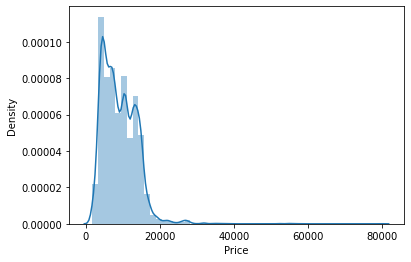

In [61]:
sns.distplot(df_train['Price'])

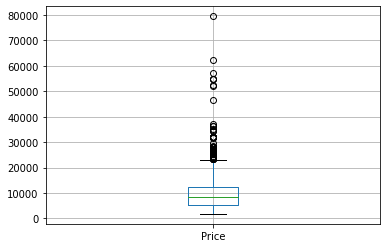

In [62]:
df_train[['Price']].boxplot()

In [63]:
import plotly.express as px

In [64]:
fig = px.scatter(x=df_train['Price'], y=df_train['Price'])
fig.show()

In [65]:
import plotly.express as px
df = px.data.tips()
fig = px.box(df, y=df_train['Price'])
fig.show()

In [66]:
df_train['Price'].describe()

count    10683.000000
mean      9087.064121
std       4611.359167
min       1759.000000
25%       5277.000000
50%       8372.000000
75%      12373.000000
max      79512.000000
Name: Price, dtype: float64

In [67]:
Q1 = df_train['Price'].quantile(0.25)
Q3 = df_train['Price'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

7096.0


In [68]:
lower_bound_val = Q1 -(1.5 * IQR) 
upper_bound_val = Q3 +(1.5 * IQR)

In [69]:
df_train_no_outlier = df_train[(df_train.Price>lower_bound_val)&(df_train.Price<upper_bound_val)]
df_train_no_outlier

,Airline,Source,Destination,Additional_Info,Price,Date,Month,Year,day_type,Stop,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute,Route_1,Route_2,Route_3,Route_4,Route_5
0,3,0,5,8,3897.0,24,3,2019,2,0,1,10,22,20,0,13,24,12,4
1,1,3,0,8,7662.0,1,5,2019,1,2,13,15,5,50,2,25,1,3,4
2,4,2,1,8,13882.0,9,6,2019,2,2,4,25,9,25,3,32,4,5,4
3,3,3,0,8,6218.0,12,5,2019,2,1,23,30,18,5,2,34,3,12,4
4,3,0,5,8,13302.0,1,3,2019,1,1,21,35,16,50,0,34,8,12,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,3,0,8,4107.0,9,4,2019,1,0,22,25,19,55,2,5,24,12,4
10679,1,3,0,8,4145.0,27,4,2019,2,0,23,20,20,45,2,5,24,12,4
10680,4,0,2,8,7229.0,27,4,2019,2,0,11,20,8,20,0,13,24,12,4
10681,10,0,5,8,12648.0,1,3,2019,1,0,14,10,11,30,0,13,24,12,4


In [70]:
df_train_no_outlier['Price'].describe()

count    10589.000000
mean      8897.661724
std       4069.120294
min       1759.000000
25%       5228.000000
50%       8355.000000
75%      12312.000000
max      23001.000000
Name: Price, dtype: float64

In [71]:
import plotly.express as px
df = px.data.tips()
fig = px.box(df, y=df_train_no_outlier['Price'])
fig.show()

In [72]:
df_train[(df_train.Price>20000)&(df_train.Price<25000)]

,Airline,Source,Destination,Additional_Info,Price,Date,Month,Year,day_type,Stop,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute,Route_1,Route_2,Route_3,Route_4,Route_5
7,4,0,5,8,22270.0,1,3,2019,1,1,5,5,8,0,0,7,8,12,4
515,1,2,1,8,22096.0,3,3,2019,2,2,19,15,22,0,3,16,4,5,4
1067,4,2,1,8,20064.0,3,3,2019,2,2,4,25,5,25,3,21,4,5,4
1074,4,0,5,8,20800.0,1,3,2019,1,1,9,0,11,40,0,7,8,12,4
1145,4,2,1,8,21219.0,6,5,2019,1,2,19,0,11,40,3,29,4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10351,4,4,3,8,22294.0,12,3,2019,1,1,16,35,3,0,1,14,13,12,4
10353,4,4,3,8,24210.0,6,3,2019,1,2,16,50,19,50,1,3,9,9,4
10456,4,2,1,8,20694.0,6,3,2019,1,2,18,50,19,10,3,0,4,5,4
10561,4,0,5,8,20800.0,1,3,2019,1,1,9,0,14,5,0,7,8,12,4


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



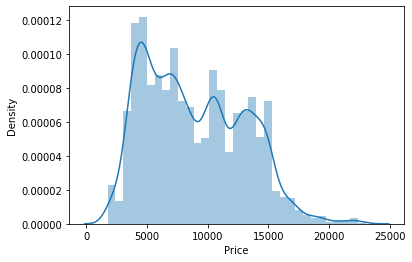

In [73]:
sns.distplot(df_train_no_outlier['Price'])

In [74]:
maxValue = df_train['Price'].max()
  
print(maxValue)

79512.0


In [75]:
df_train.Year.unique()

array([2019])

In [76]:
# find the maximum of each column
maxValue = df_train['Price'].max()
  
print(maxValue)


79512.0


In [77]:
# find the maximum of each column
maxValue = df_train_no_outlier['Price'].max()
  
print(maxValue)

23001.0


In [78]:
df_train_no_outlier=df_train_no_outlier.drop(['Year'],axis=1)

In [79]:
df_train_no_outlier

,Airline,Source,Destination,Additional_Info,Price,Date,Month,day_type,Stop,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute,Route_1,Route_2,Route_3,Route_4,Route_5
0,3,0,5,8,3897.0,24,3,2,0,1,10,22,20,0,13,24,12,4
1,1,3,0,8,7662.0,1,5,1,2,13,15,5,50,2,25,1,3,4
2,4,2,1,8,13882.0,9,6,2,2,4,25,9,25,3,32,4,5,4
3,3,3,0,8,6218.0,12,5,2,1,23,30,18,5,2,34,3,12,4
4,3,0,5,8,13302.0,1,3,1,1,21,35,16,50,0,34,8,12,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,3,0,8,4107.0,9,4,1,0,22,25,19,55,2,5,24,12,4
10679,1,3,0,8,4145.0,27,4,2,0,23,20,20,45,2,5,24,12,4
10680,4,0,2,8,7229.0,27,4,2,0,11,20,8,20,0,13,24,12,4
10681,10,0,5,8,12648.0,1,3,1,0,14,10,11,30,0,13,24,12,4


In [80]:
train_sample2 = df_train_no_outlier.sample(frac=0.99, random_state=213)

In [ ]:
clf2 = setup(data = train_sample2, 
             target = 'Price',
             numeric_features = ['Airline',
 'Source',
 'Destination',
 'Additional_Info',
 'Month',
 'Stop',
 'day_type',
 'Arrival_Minute',
 'Departure_Minute',
 'Arrival_Hour',
 'Departure_Hour',
 'Date',
 'Route_1',
 'Route_2',
 'Route_3',
 'Route_4',
 'Route_5'])

,Description,Value
0,session_id,5639
1,Target,Price
2,Original Data,"(10483, 18)"
3,Missing Values,False
4,Numeric Features,17
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(7338, 17)"


In [ ]:
#without outliers
#without year
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,580.2821,1.254790e+06,1117.4051,0.9236,0.1213,0.0709,1.651
et,Extra Trees Regressor,554.4249,1.269296e+06,1124.5759,0.9227,0.1239,0.0684,1.343
lightgbm,Light Gradient Boosting Machine,765.1342,1.376265e+06,1170.7495,0.9161,0.1305,0.0941,0.160
dt,Decision Tree Regressor,625.4042,2.054321e+06,1428.2850,0.8749,0.1503,0.0752,0.038
gbr,Gradient Boosting Regressor,1141.8896,2.519614e+06,1585.6972,0.8464,0.1796,0.1420,0.534
knn,K Neighbors Regressor,1529.6757,4.847579e+06,2200.7780,0.7045,0.2411,0.1818,0.073
ada,AdaBoost Regressor,2013.2660,5.915353e+06,2430.1886,0.6386,0.3214,0.3055,0.371
lasso,Lasso Regression,2139.6678,7.337501e+06,2707.8242,0.5527,0.3166,0.2785,0.023
lr,Linear Regression,2139.8668,7.337722e+06,2707.8677,0.5526,0.3166,0.2784,0.268
lar,Least Angle Regression,2139.8669,7.337722e+06,2707.8678,0.5526,0.3166,0.2784,0.018


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=3099, verbose=0, warm_start=False)

In [ ]:
#without outliers
#without year
#with day type - weekend / weekday
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,526.7572,1.129050e+06,1057.7434,0.9313,0.1169,0.0642,1.439
rf,Random Forest Regressor,567.4010,1.134493e+06,1059.7572,0.9309,0.1163,0.0690,1.649
lightgbm,Light Gradient Boosting Machine,743.3435,1.262396e+06,1121.6394,0.9232,0.1284,0.0925,0.173
dt,Decision Tree Regressor,612.7943,1.818485e+06,1342.0632,0.8895,0.1450,0.0742,0.040
gbr,Gradient Boosting Regressor,1111.4153,2.344404e+06,1530.0918,0.8575,0.1760,0.1396,0.521
knn,K Neighbors Regressor,1502.3567,4.666950e+06,2159.0224,0.7164,0.2360,0.1783,0.073
ada,AdaBoost Regressor,1887.9714,5.208131e+06,2281.4482,0.6833,0.3088,0.2888,0.390
lr,Linear Regression,2119.4722,7.194530e+06,2681.2098,0.5630,0.3153,0.2764,0.324
lasso,Lasso Regression,2119.1751,7.194573e+06,2681.2103,0.5630,0.3153,0.2764,0.029
lar,Least Angle Regression,2119.4723,7.194532e+06,2681.2102,0.5630,0.3153,0.2764,0.024


ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=-1, oob_score=False,
                    random_state=5639, verbose=0, warm_start=False)

In [ ]:
# create a model
et = create_model('et')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,536.0996,1.116958e+06,1056.8624,0.9333,0.1165,0.0675
1,510.8064,1.119557e+06,1058.0912,0.9332,0.1176,0.0640
2,566.4081,1.397421e+06,1182.1258,0.9168,0.1217,0.0654
3,482.8657,8.416442e+05,917.4117,0.9522,0.1019,0.0579
4,486.6880,8.047084e+05,897.0554,0.9493,0.1073,0.0621
5,520.4672,1.052530e+06,1025.9287,0.9371,0.1142,0.0634
6,523.3577,1.122586e+06,1059.5218,0.9287,0.1160,0.0644
7,567.6622,1.502890e+06,1225.9240,0.9080,0.1222,0.0669
8,568.9965,1.327677e+06,1152.2487,0.9204,0.1372,0.0677
9,504.2205,1.004533e+06,1002.2639,0.9342,0.1142,0.0632


In [ ]:
# save a model
save_model(et, 'rf_saved_with_day_type')

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=['Airline', 'Source',
                                                           'Destination',
                                                           'Additional_Info',
                                                           'Month', 'Stop',
                                                           'day_type',
                                                           'Arrival_Minute',
                                                           'Departure_Minute',
                                                           'Arrival_Hour',
                                                           'Departure_Hour',
                                        

In [81]:
X=df_train_no_outlier.drop(['Price'],axis=1)
y=df_train_no_outlier.Price

In [82]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [84]:
X_train

,Airline,Source,Destination,Additional_Info,Date,Month,day_type,Stop,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute,Route_1,Route_2,Route_3,Route_4,Route_5
4056,6,2,1,8,21,3,1,1,15,30,9,0,3,7,6,12,4
5751,8,2,1,8,9,6,2,1,22,50,17,55,3,6,6,12,4
4201,4,2,1,5,6,6,1,1,4,25,14,0,3,7,6,12,4
4187,4,2,1,8,1,6,2,2,19,0,11,40,3,29,4,5,4
518,6,2,1,8,21,3,1,1,1,35,11,30,3,7,6,12,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9306,3,0,2,8,18,6,1,0,6,50,4,0,0,13,24,12,4
4900,3,2,1,8,3,6,1,1,12,10,7,35,3,20,6,12,4
3299,4,0,5,5,15,3,1,1,13,15,8,0,0,7,8,12,4
9928,4,2,1,5,9,5,1,1,12,35,14,0,3,7,6,12,4


In [83]:


from sklearn.ensemble import ExtraTreesRegressor
reg = ExtraTreesRegressor(n_estimators=100, random_state=0).fit(X_train, y_train)
from sklearn.metrics import mean_absolute_error
y_pred=reg.predict(X_test)
mean_absolute_error(y_test, y_pred)


539.909592907355

In [85]:
import pickle
pickle.dump(reg,open("ext_tree_without_pycaret1.pkl", 'wb'))

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state = 42)
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())


{'bootstrap': True,
 'criterion': 'mae',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': 1,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


{'bootstrap': True,
 'criterion': 'mae',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': 1,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

Random search CV

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)
{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed: 23.0min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 42.9min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [ ]:
rf_random.best_params_

{'bootstrap': True,
 'max_depth': 100,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 1400}

In [ ]:
from sklearn.metrics import mean_absolute_error
y_pred=rf_random.predict(X_test)


In [ ]:
 mean_absolute_error(y_test, y_pred)

594.7573289083556

In [ ]:
import pickle

In [ ]:
pickle.dump(rf_random,open("rf_random_flight.pkl", 'wb'))

In [ ]:
!pip freeze > requirements.txt

In [ ]:
#Will be deploying with extra Trees Regressor w/o hyperparameter tuning verion as size of random search CV is over 500mb